# Laboratorio 05: Cálculo Numérico.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Candy Valentina López Villanueva
*Métodos computacionales 2025-I*

---

# 1.

En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de Kirchhoff nos da la siguiente relación

$$
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
$$

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

```
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])  # tiempo
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])  # corriente
```


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H y la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [1]:
#Aquí va su código
import numpy as np
import pandas as pd

def crear_dataframe(t, i):
    """
    Crea un DataFrame con los datos de tiempo y corriente.

    Parámetros:
    ----------
    t : np.ndarray
        Arreglo con los valores de tiempo (en segundos).
    i : np.ndarray
        Arreglo con los valores de corriente (en Amperios).

    Retorna:
    -------
    pd.DataFrame
        DataFrame con columnas 'Tiempo (s)' y 'Corriente (A)'.
    """
    return pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i})

# Datos dados
t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

df = crear_dataframe(t, i)
print(df)

   Tiempo (s)  Corriente (A)
0        1.00           3.10
1        1.01           3.12
2        1.02           3.14
3        1.03           3.18
4        1.04           3.24


In [2]:
def derivada_tres_puntos(t, i):
    """
    Calcula la derivada usando el método de tres puntos (centrado) para valores internos
    y el método hacia adelante/atrás para los extremos.

    Parámetros:
    ----------
    t : np.ndarray
        Arreglo con los valores de tiempo.
    i : np.ndarray
        Arreglo con los valores de corriente.

    Retorna:
    -------
    np.ndarray
        Derivada de la corriente respecto al tiempo en los puntos dados.
    """
    n = len(i)
    di_dt = np.zeros(n)
    h = t[1] - t[0]  # Suponemos espaciado uniforme

    # Extremos con diferencias hacia adelante y atrás
    di_dt[0] = (-3*i[0] + 4*i[1] - i[2]) / (2*h)
    di_dt[-1] = (3*i[-1] - 4*i[-2] + i[-3]) / (2*h)

    # Interior con diferencia centrada
    for j in range(1, n - 1):
        di_dt[j] = (i[j+1] - i[j-1]) / (2*h)

    return di_dt

In [3]:
def calcular_voltaje(t, i, L, R):
    """
    Calcula el voltaje ε(t) usando la ecuación de Kirchhoff.

    Parámetros:
    ----------
    t : np.ndarray
        Arreglo de tiempos.
    i : np.ndarray
        Arreglo de corrientes.
    L : float
        Inductancia en Henrios.
    R : float
        Resistencia en Ohmios.

    Retorna:
    -------
    np.ndarray
        Valores de voltaje ε(t) en los tiempos dados.
    """
    di_dt = derivada_tres_puntos(t, i)
    return L * di_dt + R * i

In [4]:
def derivada_interpolacion(t, i, grado=3):
    """
    Calcula la derivada de la corriente interpolando con un polinomio.

    Parámetros:
    ----------
    t : np.ndarray
        Arreglo de tiempos.
    i : np.ndarray
        Arreglo de corriente.
    grado : int
        Grado del polinomio a ajustar.

    Retorna:
    -------
    np.ndarray
        Derivada de la corriente interpolada en los puntos dados.
    """
    coef = np.polyfit(t, i, grado)
    p_derivada = np.polyder(coef)
    return np.polyval(p_derivada, t)

In [5]:
# Constantes
L = 0.98  # H
R = 0.142  # Ohm

# Derivadas
di_dt_num = derivada_tres_puntos(t, i)
di_dt_interp = derivada_interpolacion(t, i)

# Voltajes
voltaje_num = calcular_voltaje(t, i, L, R)
voltaje_interp = L * di_dt_interp + R * i

# Mostrar comparación
comparacion_df = pd.DataFrame({
    't (s)': t,
    'i (A)': i,
    'di/dt numérico': di_dt_num,
    'di/dt interp.': di_dt_interp,
    'ε(t) numérico': voltaje_num,
    'ε(t) interp.': voltaje_interp
})

print(comparacion_df)

   t (s)  i (A)  di/dt numérico  di/dt interp.  ε(t) numérico  ε(t) interp.
0   1.00   3.10             2.0       1.976190        2.40020      2.376867
1   1.01   3.12             2.0       1.904762        2.40304      2.309707
2   1.02   3.14             3.0       2.833333        3.38588      3.222547
3   1.03   3.18             5.0       4.761905        5.35156      5.118227
4   1.04   3.24             7.0       7.690476        7.32008      7.996747


# 2.
Utilizando los siguientes datos de tiempo y distancia:

```
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo en s
x = np.array([0, 225, 383, 623, 742, 993])  # Distancia recorrida en m
```

- Determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

- ¿Cuál será la velocidad para $t=12$?




In [6]:
#Aquí va su código
import numpy as np

def velocidad_gradient(t, x):
    """
    Calcula la velocidad instantánea usando np.gradient.

    Parámetros:
    ----------
    t : np.ndarray
        Tiempo (s).
    x : np.ndarray
        Posición (m).

    Retorna:
    -------
    np.ndarray
        Velocidad instantánea estimada (m/s).
    """
    return np.gradient(x, t)

In [7]:
def velocidad_en_t_interpolada(t, x, t_objetivo, grado=3):
    """
    Estima la velocidad en un tiempo específico usando interpolación polinómica.

    Parámetros:
    ----------
    t : np.ndarray
        Tiempos conocidos.
    x : np.ndarray
        Posiciones conocidas.
    t_objetivo : float
        Tiempo donde se desea estimar la velocidad.
    grado : int
        Grado del polinomio a usar en la interpolación.

    Retorna:
    -------
    float
        Velocidad estimada en t_objetivo (m/s).
    """
    coef = np.polyfit(t, x, grado)  # Ajuste polinomial
    derivada = np.polyder(coef)    # Derivada del polinomio
    return np.polyval(derivada, t_objetivo)

In [8]:
# Datos
t = np.array([0, 3, 5, 8, 10, 13])  # Tiempo (s)
x = np.array([0, 225, 383, 623, 742, 993])  # Posición (m)

# Velocidad con gradient
v_gradient = velocidad_gradient(t, x)

# Velocidad en t = 12 por interpolación
v_interpolada_12 = velocidad_en_t_interpolada(t, x, t_objetivo=12)

# Resultados
import pandas as pd

df_vel = pd.DataFrame({
    't (s)': t,
    'x (m)': x,
    'v (m/s) - gradient': v_gradient
})

print(df_vel)
print(f"\n Velocidad estimada en t = 12 s usando interpolación: {v_interpolada_12:.2f} m/s")

   t (s)  x (m)  v (m/s) - gradient
0      0      0           75.000000
1      3    225           77.400000
2      5    383           79.400000
3      8    623           67.700000
4     10    742           69.166667
5     13    993           83.666667

 Velocidad estimada en t = 12 s usando interpolación: 77.88 m/s


# 3.
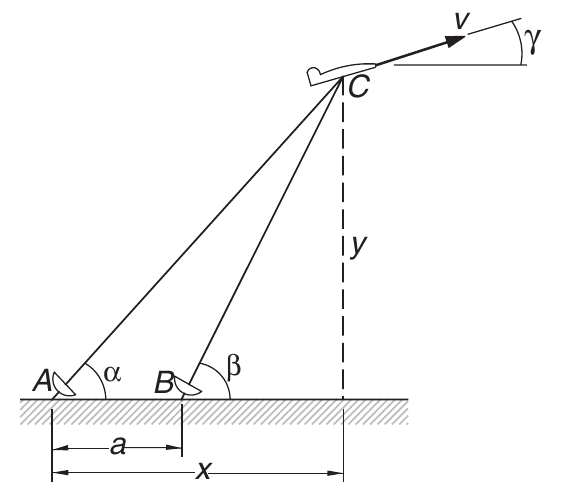


Las estaciones de radar $A$ y $B$, separadas por una distancia $a = 500 \, \text{m}$, rastrean un avión $C$ registrando los ángulos $\alpha$ y $\beta$ en intervalos de 1 segundo. Tres lecturas sucesivas son


```
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}

df = pd.DataFrame(data)
```

Calcular la velocidad $v$ del avión y el ángulo de ascenso $\gamma$ en $t = 10 \, \text{s}$. Las coordenadas del avión pueden expresarse como:

$$
x = a \frac{\tan \beta}{\tan \beta - \tan \alpha}
$$

$$
y = a \frac{\tan \alpha \tan \beta}{\tan \beta - \tan \alpha}
$$

In [9]:
#Aquí va su código
import numpy as np
import pandas as pd

# Datos proporcionados
data = {
    't (s)': [9, 10, 11],
    'alpha (°)': [54.80, 54.06, 53.34],
    'beta (°)': [65.59, 64.59, 63.62]
}
df = pd.DataFrame(data)

# Constante
a = 500  # m

def calcular_posiciones(df, a):
    """
    Calcula las coordenadas x, y a partir de los ángulos alpha y beta.

    Parámetros:
    ----------
    df : pd.DataFrame
        Contiene t, alpha (°), beta (°)
    a : float
        Distancia entre estaciones (m)

    Retorna:
    -------
    pd.DataFrame con columnas x, y
    """
    alpha_rad = np.radians(df['alpha (°)'])
    beta_rad = np.radians(df['beta (°)'])

    tan_alpha = np.tan(alpha_rad)
    tan_beta = np.tan(beta_rad)
    denom = tan_beta - tan_alpha

    x = a * tan_beta / denom
    y = a * tan_alpha * tan_beta / denom

    df['x (m)'] = x
    df['y (m)'] = y
    return df

df = calcular_posiciones(df, a)

# Derivadas numéricas para velocidad
vx = np.gradient(df['x (m)'], df['t (s)'])
vy = np.gradient(df['y (m)'], df['t (s)'])

# Velocidad total y ángulo en t = 10 s (índice 1)
v = np.sqrt(vx**2 + vy**2)
gamma_rad = np.arctan2(vy, vx)
gamma_deg = np.degrees(gamma_rad)

# Añadir a la tabla
df['v_x (m/s)'] = vx
df['v_y (m/s)'] = vy
df['v (m/s)'] = v
df['gamma (°)'] = gamma_deg

# Mostrar resultados en t = 10 s
fila_10s = df[df['t (s)'] == 10]

print(fila_10s[['t (s)', 'x (m)', 'y (m)', 'v (m/s)', 'gamma (°)']])

   t (s)        x (m)        y (m)    v (m/s)  gamma (°)
1     10  1450.497006  2000.840713  50.099442  15.137988


# 4.
Se proporcionan los siguientes datos para la velocidad de un objeto en función del tiempo:

```
# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # segundos
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s
```
- ¿Qué tan lejos viaja el objeto desde $t = 0$ hasta 28 s?
- ¿Cuál es la aceleración del objeto a $t = 28$ s?

In [10]:
#Aquí va su código
import numpy as np
from scipy.integrate import simpson

# Datos de tiempo y velocidad
t = np.array([0, 4, 8, 12, 16, 20, 24, 28, 32, 36])  # s
v = np.array([0, 34.7, 61.8, 82.8, 99.2, 112.0, 121.9, 129.7, 135.7, 140.4])  # m/s

# Parte 1: distancia recorrida de t = 0 a 28 s
# Seleccionar los valores hasta t = 28 s (índice 7 incluido)
t_sub = t[:8]
v_sub = v[:8]

# Integración usando regla del trapecio
distancia_trapecio = np.trapz(v_sub, t_sub)

# Integración usando regla de Simpson
distancia_simpson = simpson(v_sub, t_sub)

# Parte 2: aceleración en t = 28 s
a = np.gradient(v, t)  # Derivada de v con respecto a t

# Encontrar índice correspondiente a t = 28 s
idx_28 = np.where(t == 28)[0][0]
aceleracion_28 = a[idx_28]

# Resultados
print(f"Distancia recorrida (trapecio) entre 0 y 28 s: {distancia_trapecio:.2f} m")
print(f"Distancia recorrida (Simpson) entre 0 y 28 s: {distancia_simpson:.2f} m")
print(f"Aceleración en t = 28 s: {aceleracion_28:.2f} m/s²")

Distancia recorrida (trapecio) entre 0 y 28 s: 2309.00 m
Distancia recorrida (Simpson) entre 0 y 28 s: 2319.77 m
Aceleración en t = 28 s: 1.72 m/s²


<ipython-input-10-8519bff35e71>:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  distancia_trapecio = np.trapz(v_sub, t_sub)


# 5.

El área superficial horizontal $A_s$ ($m^2$) de un lago a una profundidad particular puede calcularse a partir del volumen por diferenciación:

$$A_s(z) = -\frac{dV(z)}{dz}$$

donde:
- $V$ = volumen ($m^3$)
- $z$ = profundidad ($m$) medida desde la superficie hacia el fondo


La concentración promedio de una sustancia que varía con la profundidad $c$ ($g/m^3$) puede calcularse por integración:

$$c = \frac{\int_0^Z c(z)A_s(z) dz}{V_T}$$

donde:
- $Z$ = profundidad total (m)
- $V_T$ = volumen total del lago, dado también por:


$$V_T = \int_0^Z A_s(z) dz$$
Con base en los siguientes datos, determine la concentración promedio.
```
# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Parámetros importantes
Z = z[-1]  # profundidad total (16 m)
```

In [14]:
#Aquí va su código
import numpy as np
from scipy.integrate import simpson

# Datos proporcionados
z = np.array([0, 4, 8, 12, 16])  # profundidad en metros
V = np.array([9.8175, 5.1051, 1.9635, 0.3927, 0.0000]) * 1e6  # volumen en m³
c = np.array([10.2, 8.5, 7.4, 5.2, 4.1])  # concentración en g/m³

# Profundidad total
Z = z[-1]

# Paso 1: Área superficial por diferenciación
dV_dz = np.gradient(V, z)         # dV/dz
A_s = -dV_dz                      # A_s(z) = -dV/dz

# Paso 2: Volumen total por integración
V_T = simpson(A_s, z)

# Paso 3: Integrar numerador para la concentración promedio
numerador = simpson(c * A_s, z)

# Concentración promedio
c_promedio = numerador / V_T

# Resultados
print(f"Área superficial A_s(z): {A_s}")
print(f"Volumen total del lago V_T: {V_T:.2f} m³")
print(f"Concentración promedio: {c_promedio:.2f} g/m³")

Área superficial A_s(z): [1178100.   981750.   589050.   245437.5   98175. ]
Volumen total del lago V_T: 9817500.00 m³
Concentración promedio: 8.10 g/m³


# 6.
La función de onda del electrón en estado 2s ($n=2$, $l=0$, $m=0$) en unidades radiales adimensionales es:

$$\psi_{200}(r,\theta,\varphi) = \frac{1}{4\sqrt{2\pi}} (2 - r) e^{-r/2}$$

La probabilidad de encontrar el electrón entre $r=0$ y $r=R$ está dada por:

$$P(R) = \frac{1}{8} \int_0^R r^2 (2 - r)^2 e^{-r} dr$$

donde las integrales angulares contribuyen un factor de $4\pi$.

- Calcule las probabilidades $P(R)$ para $R \in [10,25]$ con incrementos de 1 utilizando los métodos:
    - Trapezoidal
    - Simpson
    - Cuadratura
    
Garantizando que el error sea mejor a $\varepsilon = 10^{-6}$
- Calcule la integral radial desde $r=0$ hasta $+\infty$, verifique que la probabilidad total sea 1.



In [21]:
#Aquí va su código
def integrando(r):
    """
    Calcula la función integrando para la probabilidad radial del estado 2s del hidrógeno.

    Parámetros:
        r (float o array): Distancia radial.

    Retorna:
        float o array: Valor de r² (2 - r)² e^(-r).
    """
    return r**2 * (2 - r)**2 * np.exp(-r)

In [27]:
def trapezoidal_adaptativo(f, a, b, tol=1e-6, max_iter=50):
    """
    Calcula la integral definida usando el método trapezoidal adaptativo con tolerancia.

    Parámetros:
        f (función): Función a integrar.
        a (float): Límite inferior de integración.
        b (float): Límite superior de integración.
        tol (float): Tolerancia para el error.
        max_iter (int): Iteraciones máximas permitidas.

    Retorna:
        float: Aproximación de la integral definida.
    """
    n = 1
    h = b - a
    T_prev = h * (f(a) + f(b)) / 2

    for _ in range(max_iter):
        n *= 2
        h /= 2
        x = np.linspace(a + h, b - h, n - 1)
        T = 0.5 * T_prev + h * np.sum(f(x))
        if abs(T - T_prev) < tol:
            return T
        T_prev = T

    raise RuntimeError("No se alcanzó la tolerancia deseada")

In [28]:
from scipy.integrate import simpson, quad

def simpson_prob(f, a, b, n=1001):
    """
    Calcula la integral definida utilizando el método de Simpson.

    Parámetros:
        f (función): Función a integrar.
        a (float): Límite inferior de integración.
        b (float): Límite superior de integración.
        n (int): Número de puntos.

    Retorna:
        float: Aproximación de la integral definida.
    """
    r = np.linspace(a, b, n)
    return simpson(f(r), r)

def cuadratura_prob(f, a, b, eps=1e-6):
    """
    Calcula la integral definida usando cuadratura de alta precisión.

    Parámetros:
        f (función): Función a integrar.
        a (float): Límite inferior.
        b (float): Límite superior.
        eps (float): Tolerancia absoluta.

    Retorna:
        float: Aproximación de la integral.
    """
    resultado, _ = quad(f, a, b, epsabs=eps)
    return resultado

In [29]:
import numpy as np
import pandas as pd

def calcular_probabilidades(R_vals):
    """
    Calcula las probabilidades P(R) usando tres métodos numéricos:
    trapezoidal adaptativo, Simpson y cuadratura.

    Parámetros:
        R_vals (array): Valores de R para los cuales se calcula P(R).

    Retorna:
        DataFrame: Tabla con P(R) calculadas por cada método.
    """
    P_trap, P_simp, P_quad = [], [], []

    for R in R_vals:
        val_trap = (1/8) * trapezoidal_adaptativo(integrando, 0, R)
        val_simp = (1/8) * simpson_prob(integrando, 0, R)
        val_quad = (1/8) * cuadratura_prob(integrando, 0, R)

        P_trap.append(val_trap)
        P_simp.append(val_simp)
        P_quad.append(val_quad)

    return pd.DataFrame({
        'R': R_vals,
        'Trapezoidal': P_trap,
        'Simpson': P_simp,
        'Cuadratura': P_quad
    })

In [30]:
def calcular_probabilidad_total():
    """
    Calcula la probabilidad total desde r = 0 hasta ∞ para verificar normalización.

    Retorna:
        float: Valor de la integral total esperada ≈ 1.
    """
    total, _ = quad(integrando, 0, np.inf, epsabs=1e-9)
    return (1/8) * total

In [31]:
# Valores de R para evaluar
R_vals = np.arange(10, 26)

# Cálculo de probabilidades
tabla_resultados = calcular_probabilidades(R_vals)
print(tabla_resultados)

# Probabilidad total
P_total = calcular_probabilidad_total()
print(f"\nProbabilidad total desde 0 hasta ∞: {P_total:.8f}")

     R  Trapezoidal   Simpson  Cuadratura
0   10     1.880961  0.940481    0.940481
1   11     1.936446  0.968223    0.968223
2   12     1.967104  0.983552    0.983552
3   13     1.983415  0.991708    0.991708
4   14     1.991826  0.995913    0.995913
5   15     1.996050  0.998025    0.998025
6   16     1.998123  0.999062    0.999062
7   17     1.999122  0.999561    0.999561
8   18     1.999595  0.999797    0.999797
9   19     1.999815  0.999908    0.999908
10  20     1.999917  0.999958    0.999958
11  21     1.999963  0.999981    0.999981
12  22     1.999983  0.999992    0.999992
13  23     1.999993  0.999996    0.999996
14  24     1.999997  0.999998    0.999998
15  25     1.999999  0.999999    0.999999

Probabilidad total desde 0 hasta ∞: 1.00000000


# 7.
Una lámina cuadrada uniforme de metal flota inmóvil en el espacio:

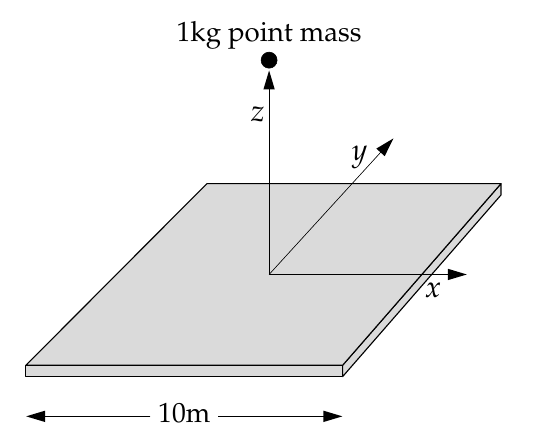

La lámina cuadrada tiene 10 m de lado y espesor despreciable. La componente de la fuerza gravitacional a lo largo del eje $z$ sobre una masa de prueba de 1 kg ubicada a distancia $z$ del centro de la lámina es:

$$F_z = G\sigma z \iint_{-L/2}^{L/2} \frac{dx \, dy}{(x^2 + y^2 + z^2)^{3/2}}$$

donde $G = 6.674 \times 10^{-11} \, \text{m}^3 \, \text{kg}^{-1} \, \text{s}^{-2}$, $\sigma = \frac{M}{L^2}$, $L = 10$ m y $M = 10,000$ kg.

- Calcular numéricamente esta integral doble.
- Graficar $F_z$ como función de $z$ desde $z=0$ hasta $z=10$ m


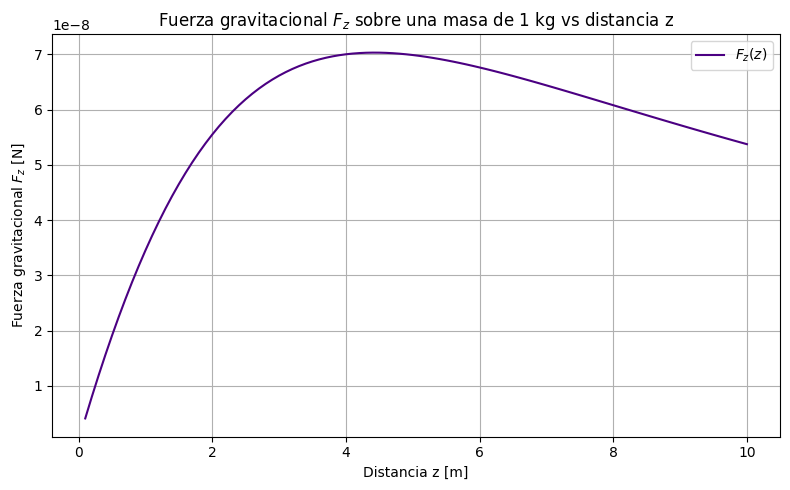

In [32]:
#Aquí va su código
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constantes físicas
G = 6.674e-11  # constante gravitacional [m^3 kg^-1 s^-2]
L = 10  # longitud de la lámina [m]
M = 10000  # masa total de la lámina [kg]
sigma = M / (L**2)  # densidad superficial [kg/m^2]

# Función integrando para Fz (la integral depende de z)
def integrando(y, x, z):
    return z / ((x**2 + y**2 + z**2)**(3/2))

# Función para calcular Fz dado un valor de z
def calcular_Fz(z):
    integral, error = dblquad(
        integrando,
        -L/2, L/2,  # límites en x
        lambda x: -L/2, lambda x: L/2,  # límites en y
        args=(z,)  # pasamos z como parámetro adicional
    )
    return G * sigma * z * integral

# Vector de valores de z
z_vals = np.linspace(0.1, 10, 100)  # desde 0.1 para evitar división por cero
Fz_vals = np.array([calcular_Fz(z) for z in z_vals])

# Graficar Fz vs z
plt.figure(figsize=(8, 5))
plt.plot(z_vals, Fz_vals, label=r'$F_z(z)$', color='indigo')
plt.xlabel('Distancia z [m]')
plt.ylabel('Fuerza gravitacional $F_z$ [N]')
plt.title('Fuerza gravitacional $F_z$ sobre una masa de 1 kg vs distancia z')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
import numpy as np
from scipy.integrate import dblquad
import pandas as pd

# Constantes físicas
G = 6.674e-11           # Constante de gravitación universal [m^3 kg^-1 s^-2]
L = 10                  # Longitud de la lámina [m]
M = 10000               # Masa total de la lámina [kg]
sigma = M / (L**2)      # Densidad superficial [kg/m^2]

# Función integrando para la componente z de la fuerza
def integrando(y, x, z):
    """
    Devuelve el integrando de la fórmula de Fz.

    Parámetros:
    - y: variable de integración en y
    - x: variable de integración en x
    - z: posición sobre el eje z de la masa puntual

    Retorna:
    - Valor del integrando para los valores dados.
    """
    return z / ((x**2 + y**2 + z**2)**(3/2))

# Cálculo de la componente Fz de la fuerza gravitacional
def calcular_Fz(z):
    """
    Calcula la componente de la fuerza gravitacional Fz sobre una
    masa puntual ubicada a una distancia z del centro de una lámina.

    Parámetros:
    - z: distancia desde el centro de la lámina [m]

    Retorna:
    - Fz: componente z de la fuerza gravitacional [N]
    - integral: resultado de la integral doble (adimensional)
    - error: estimación del error en la integración
    """
    integral, error = dblquad(
        integrando,                     # función integrando
        -L/2, L/2,                      # límites en x
        lambda x: -L/2, lambda x: L/2, # límites en y
        args=(z,)                      # z como parámetro adicional
    )
    Fz = G * sigma * z * integral
    return Fz, integral, error

# Crear una tabla de resultados para múltiples valores de z
z_vals = np.linspace(0.5, 10, 20)  # valores de z entre 0.5 y 10 m
resultados = []

for z in z_vals:
    Fz, integral, error = calcular_Fz(z)
    resultados.append({
        "z (m)": z,
        "Integral": integral,
        "Error estimado": error,
        "Fz (N)": Fz
    })

# Convertir a DataFrame y mostrar
df_resultados = pd.DataFrame(resultados)
pd.set_option("display.float_format", "{:.6e}".format)
print(df_resultados)

          z (m)     Integral  Error estimado       Fz (N)
0  5.000000e-01 5.719842e+00    5.341620e-08 1.908711e-08
1  1.000000e+00 5.170198e+00    2.870783e-08 3.450590e-08
2  1.500000e+00 4.646303e+00    1.337986e-08 4.651414e-08
3  2.000000e+00 4.157352e+00    2.908006e-08 5.549234e-08
4  2.500000e+00 3.709181e+00    9.701644e-09 6.188768e-08
5  3.000000e+00 3.304402e+00    1.251845e-08 6.616074e-08
6  3.500000e+00 2.942987e+00    5.975243e-09 6.874523e-08
7  4.000000e+00 2.623011e+00    1.039715e-08 7.002391e-08
8  4.500000e+00 2.341376e+00    1.347211e-08 7.031855e-08
9  5.000000e+00 2.094395e+00    9.825681e-09 6.988996e-08
10 5.500000e+00 1.878216e+00    1.980113e-08 6.894369e-08
11 6.000000e+00 1.689097e+00    2.801474e-09 6.763821e-08
12 6.500000e+00 1.523562e+00    4.355482e-10 6.609363e-08
13 7.000000e+00 1.378475e+00    7.393510e-11 6.439959e-08
14 7.500000e+00 1.251067e+00    1.361828e-11 6.262215e-08
15 8.000000e+00 1.138922e+00    2.705680e-12 6.080934e-08
16 8.500000e+0